#Ocorrências na Aviação Brasileira - Análise de exploração de dados


A seguinte análise tem como objetivo extrair dados e entender o comportamento de ocorrências na aviação brasileira. A base de dados de ocorrências aeronáuticas é gerenciada pelo Centro de Investigação e Prevenção de Acidentes Aeronáuticos (CENIPA). Constam nesta base de dados as ocorrências aeronáuticas notificadas ao CENIPA no anos de 2012 a 2021 que ocorreram em solo brasileiro.

  <p>codigo_ocorrencia
  <p>codigo_ocorrencia1
  <p>codigo_ocorrencia2
  <p>codigo_ocorrencia3	
  <p>codigo_ocorrencia4	
  <p>ocorrencia_classificacao	
  <p>ocorrencia_latitude	
  <p>ocorrencia_longitude	
  <p>ocorrencia_cidade	ocorrencia_uf	
  <p>ocorrencia_dia	
  <p>ocorrencia_hora	
  <p>investigacao_aeronave_liberada	
  <p>investigacao_status	
 <p> divulgacao_relatorio_numero	
  <p>divulgacao_relatorio_publicado	
  <p>divulgacao_dia_publicacao	
  <p>total_recomendacoes	
  <p>total_aeronaves_envolvidas	
  <p>ocorrencia_saida_pista

In [1]:
#Importando bibliotecas

#Manipulacao de dados
import numpy as np
import pandas as pd

#Visualizacao de dados
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import missingno

from sklearn.preprocessing import LabelEncoder

In [18]:
df = pd.read_csv('ocorrencia.csv', sep=';', date_parser = True)

In [19]:
df.columns

Index(['codigo_ocorrencia', 'codigo_ocorrencia1', 'codigo_ocorrencia2',
       'codigo_ocorrencia3', 'codigo_ocorrencia4', 'ocorrencia_classificacao',
       'ocorrencia_latitude', 'ocorrencia_longitude', 'ocorrencia_cidade',
       'ocorrencia_uf', 'ocorrencia_pais', 'ocorrencia_aerodromo',
       'ocorrencia_dia', 'ocorrencia_hora', 'investigacao_aeronave_liberada',
       'investigacao_status', 'divulgacao_relatorio_numero',
       'divulgacao_relatorio_publicado', 'divulgacao_dia_publicacao',
       'total_recomendacoes', 'total_aeronaves_envolvidas',
       'ocorrencia_saida_pista'],
      dtype='object')

In [21]:
df.drop(['codigo_ocorrencia1','codigo_ocorrencia2','codigo_ocorrencia3','codigo_ocorrencia4'],axis=1, inplace=True)

In [39]:
df.isnull().sum()/df.shape[0]*100

codigo_ocorrencia                  0.000000
ocorrencia_classificacao           0.000000
ocorrencia_latitude               18.869750
ocorrencia_longitude              18.869750
ocorrencia_cidade                  0.000000
ocorrencia_uf                      0.000000
ocorrencia_pais                    0.000000
ocorrencia_aerodromo               0.000000
ocorrencia_dia                     0.000000
ocorrencia_hora                    0.019354
investigacao_aeronave_liberada     3.212696
investigacao_status                4.973873
divulgacao_relatorio_numero        7.431779
divulgacao_relatorio_publicado     0.000000
total_recomendacoes                0.000000
total_aeronaves_envolvidas         0.000000
ocorrencia_saida_pista             0.000000
dtype: float64

In [28]:
df.drop(['divulgacao_dia_publicacao'],axis=1, inplace=True)

In [40]:
df1 = df.dropna(axis=0)

In [41]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
codigo_ocorrencia,3644.0,67572.067783,13090.087103,45331.0,53203.75,77396.5,79277.25,80468.0
total_recomendacoes,3644.0,0.297750,0.905945,0.0,0.00,0.0,0.00,11.0
total_aeronaves_envolvidas,3644.0,1.013172,0.116410,1.0,1.00,1.0,1.00,3.0


In [56]:
df1

,codigo_ocorrencia,ocorrencia_classificacao,ocorrencia_latitude,ocorrencia_longitude,ocorrencia_cidade,ocorrencia_uf,ocorrencia_pais,ocorrencia_aerodromo,ocorrencia_dia,ocorrencia_hora,investigacao_aeronave_liberada,investigacao_status,divulgacao_relatorio_numero,divulgacao_relatorio_publicado,total_recomendacoes,total_aeronaves_envolvidas,ocorrencia_saida_pista
1,45331,ACIDENTE,-23.4355555556,-46.4730555556,GUARULHOS,SP,BRASIL,SBGR,06/01/2012,13:44:00,SIM,FINALIZADA,A-582/CENIPA/2014,SIM,3,1,NÃO
4,45407,ACIDENTE,***,***,SÃO SEPÉ,RS,BRASIL,****,06/01/2012,16:30:00,SIM,FINALIZADA,A-071/CENIPA/2013,SIM,0,1,NÃO
6,50713,INCIDENTE GRAVE,***,***,CAMPINAS,SP,BRASIL,SDAI,07/01/2012,18:15:00,SIM,FINALIZADA,IG-184/CENIPA/2013,SIM,0,1,NÃO
8,45391,ACIDENTE,-19.9133333333,-48.2930555556,CONCEIÇÃO DAS ALAGOAS,MG,BRASIL,****,08/01/2012,16:00:00,***,FINALIZADA,A DEFINIR,NÃO,0,1,NÃO
9,52244,INCIDENTE,***,***,UBERLÂNDIA,MG,BRASIL,SBUL,08/01/2012,22:13:00,***,FINALIZADA,***,NÃO,0,1,NÃO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5162,80458,ACIDENTE,-17.999194,-51.642861,JATAÍ,GO,BRASIL,####,30/12/2021,20:30:00,SIM,ATIVA,A DEFINIR,NÃO,0,1,NÃO
5163,80452,ACIDENTE,-22.585556,-50.753889,MARACAÍ,SP,BRASIL,*****,31/12/2021,09:30:00,SIM,ATIVA,A DEFINIR,NÃO,0,1,NÃO
5164,80457,INCIDENTE GRAVE,-29.695833,-51.081667,NOVO HAMBURGO,RS,BRASIL,SSNH,31/12/2021,11:59:00,SIM,FINALIZADA,***,NÃO,0,1,NÃO
5165,80460,INCIDENTE,-25.403333,-49.233611,CURITIBA,PR,BRASIL,SBBI,31/12/2021,15:12:00,SIM,FINALIZADA,***,NÃO,0,1,NÃO


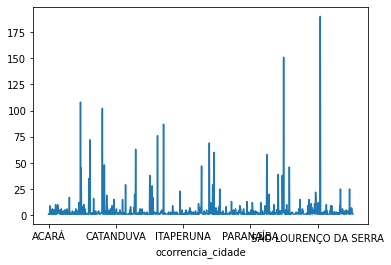

In [75]:
df1.groupby(['ocorrencia_cidade']).total_aeronaves_envolvidas.sum().plot()